In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [4]:
file_path = "data/Animation_Movies_After_Phase1.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,content_complexity,popularity_normalized,runtime_normalized,vote_average_normalized,budget_normalized,revenue_normalized,vote_count_normalized,Year_normalized,vote_count_bins,release_year
0,150540,Inside Out,7.922,19.208098,Released,2015-06-09,8.850803e+07,21.009978,False,1.954684e+07,...,5.0,0.406107,0.212312,1.572179,0.963383,0.970238,0.619616,0.925676,"(18.6, 21.7]",2015
1,14160,Up,7.949,19.208098,Released,2009-05-28,8.850803e+07,21.009978,False,1.954684e+07,...,4.0,0.406107,0.212312,1.580282,0.963383,0.970238,0.619616,0.885135,"(18.6, 21.7]",2009
2,12,Finding Nemo,7.824,19.208098,Released,2003-05-30,8.850803e+07,21.009978,False,1.954684e+07,...,2.0,0.406107,0.212312,1.542766,0.963383,0.970238,0.619616,0.844595,"(18.6, 21.7]",2003
3,354912,Coco,8.222,19.208098,Released,2017-10-27,8.850803e+07,21.009978,False,1.954684e+07,...,6.0,0.406107,0.212312,1.662216,0.963383,0.970238,0.619616,0.939189,"(18.6, 21.7]",2017
4,10681,WALL·E,8.078,19.208098,Released,2008-06-22,8.850803e+07,21.009978,False,1.954684e+07,...,3.0,0.406107,0.212312,1.618998,0.963383,0.970238,0.619616,0.878378,"(18.6, 21.7]",2008


# Check for missing values

In [5]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
processed_overview    62
dtype: int64


# Features: Genre and content similarity
# Features: genres, runtime_normalized, content_complexity


In [6]:
##%% Genre and Content Similarity Features
selected_features_genres = ['runtime_normalized', 'content_complexity']

# One-Hot Encode 'genres' (categorical feature)
onehot_encoder = OneHotEncoder(sparse_output=False)  # Replace sparse with sparse_output
encoded_genres = onehot_encoder.fit_transform(df[['genres']])
encoded_genres_df = pd.DataFrame(
    encoded_genres, columns=onehot_encoder.get_feature_names_out(['genres'])
)

# Combine numerical features with encoded genres
features_genres = pd.concat([df[selected_features_genres], encoded_genres_df], axis=1)

# Normalize numerical features
scaler = MinMaxScaler()
normalized_features_genres = scaler.fit_transform(features_genres)
print("Features for genre and content similarity normalized.")

Features for genre and content similarity normalized.


# Features: Commercial performance and popularity similarity
# Features: budget_normalized, revenue_normalized, ROI, popularity_normalized


In [7]:
##%% Commercial and Popularity Similarity Features
selected_features_commercial = ['budget_normalized', 'revenue_normalized', 'ROI', 'popularity_normalized']

# Extract and normalize the features
features_commercial = df[selected_features_commercial]
normalized_features_commercial = scaler.fit_transform(features_commercial)
print("Features for commercial and popularity similarity normalized.")

Features for commercial and popularity similarity normalized.


# Features: General combination
# Features: genres, popularity_normalized, vote_average_normalized, budget_normalized, runtime_normalized


In [8]:
##%% General Combination Features
selected_features_combined = ['popularity_normalized', 'vote_average_normalized', 'budget_normalized', 'runtime_normalized']

# Combine with encoded genres
features_combined = pd.concat([df[selected_features_combined], encoded_genres_df], axis=1)

# Normalize the combined features
normalized_features_combined = scaler.fit_transform(features_combined)
print("Features for general combination similarity normalized.")


Features for general combination similarity normalized.


# Features: Temporal analysis (pure)
# Features: release_year, release_season

In [9]:
##%% Temporal Analysis Features (Year and Season)
selected_features_time = ['release_year', 'release_season']

# One-Hot Encode 'release_season' (categorical feature)
encoded_season = onehot_encoder.fit_transform(df[['release_season']])
encoded_season_df = pd.DataFrame(
    encoded_season, columns=onehot_encoder.get_feature_names_out(['release_season'])
)

# Combine numerical features with encoded seasons
features_time = pd.concat([df[['release_year']], encoded_season_df], axis=1)

# Normalize the features
normalized_features_time = scaler.fit_transform(features_time)
print("Features for temporal analysis normalized.")

Features for temporal analysis normalized.


# Features: Temporal and content analysis
# Features: release_year, release_season, genres, runtime_normalized


In [10]:
##%% Temporal and Content Analysis Features
selected_features_time_content = ['release_year', 'runtime_normalized']

# Combine temporal and content features
features_time_content = pd.concat([df[selected_features_time_content], encoded_season_df, encoded_genres_df], axis=1)

# Normalize the features
normalized_features_time_content = scaler.fit_transform(features_time_content)
print("Features for temporal and content analysis normalized.")


Features for temporal and content analysis normalized.


# Features: Temporal and commercial analysis
# Features: release_year, release_season, budget_normalized, revenue_normalized, popularity_normalized


In [11]:
##%% Temporal and Commercial Analysis Features
selected_features_time_commercial = ['release_year', 'budget_normalized', 'revenue_normalized', 'popularity_normalized']

# Combine temporal and commercial features
features_time_commercial = pd.concat([df[selected_features_time_commercial], encoded_season_df], axis=1)

# Normalize the features
normalized_features_time_commercial = scaler.fit_transform(features_time_commercial)
print("Features for temporal and commercial analysis normalized.")


Features for temporal and commercial analysis normalized.


# K-Means Clustering: With Hyperparameter Tuning
# Perform K-Means clustering on the selected feature sets and find the optimal number of clusters.


Running K-Means for k=2...
Running K-Means for k=3...
Running K-Means for k=4...
Running K-Means for k=5...
Running K-Means for k=6...
Running K-Means for k=7...
Running K-Means for k=8...
Running K-Means for k=9...
Running K-Means for k=10...


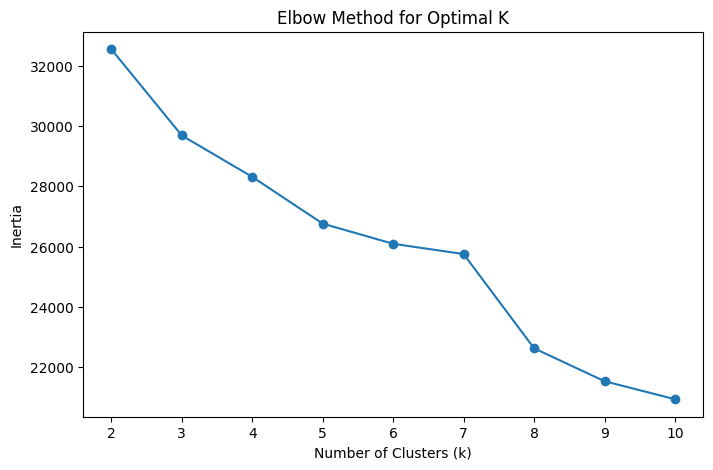

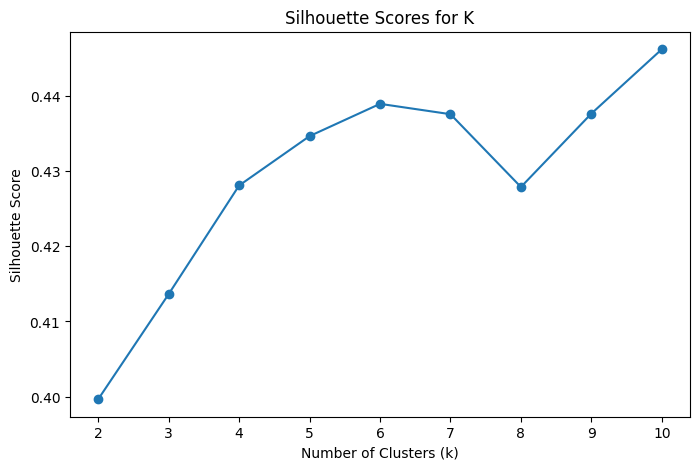

K-Means clustering completed with optimal k = 4


In [12]:
# Function to perform K-Means clustering and evaluate with Silhouette Score
def kmeans_tuning_optimized(normalized_features, max_k=10, sample_size=1000):
    inertia = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)
    
    # Use a sample of the data for silhouette scoring to improve performance
    if len(normalized_features) > sample_size:
        sample_indices = np.random.choice(len(normalized_features), size=sample_size, replace=False)
        sample_features = normalized_features[sample_indices]
    else:
        sample_features = normalized_features

    for k in k_values:
        print(f"Running K-Means for k={k}...")
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_features)
        inertia.append(kmeans.inertia_)
        
        # Compute silhouette score only if more than one cluster exists
        if k > 1:
            score = silhouette_score(sample_features, kmeans.predict(sample_features))
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(None)
    
    # Plot Elbow Method (Inertia)
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertia, marker='o')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.show()
    
    # Plot Silhouette Scores
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title("Silhouette Scores for K")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.show()
    
    return k_values, inertia, silhouette_scores

# Run K-Means tuning for a selected feature set
k_values, inertia, silhouette_scores = kmeans_tuning_optimized(normalized_features_combined, max_k=10)

# Choose optimal k based on the plots
optimal_k = 4  # Replace with the observed best value from the Elbow/Silhouette plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(normalized_features_combined)
print("K-Means clustering completed with optimal k =", optimal_k)

# DBSCAN Clustering: Testing multiple parameter sets
# Perform DBSCAN clustering with different values for `eps` and `min_samples`.


In [ ]:
def dbscan_parameter_testing_optimized(normalized_features, eps_values, min_samples_values, sample_size=1000):
    # Use a sample of the data for silhouette scoring to improve performance
    if len(normalized_features) > sample_size:
        sample_indices = np.random.choice(len(normalized_features), size=sample_size, replace=False)
        sample_features = normalized_features[sample_indices]
    else:
        sample_features = normalized_features

    results = []
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(normalized_features)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points
            
            # Compute Silhouette Score only if there are >1 clusters
            silhouette = (
                silhouette_score(sample_features, labels[sample_indices]) if n_clusters > 1 else "Not applicable"
            )
            results.append((eps, min_samples, n_clusters, silhouette))
            print(f"DBSCAN with eps={eps}, min_samples={min_samples}:")
            print(f"  Number of clusters: {n_clusters}")
            print(f"  Silhouette Score: {silhouette}")
            print()
    return results

# Test multiple values for eps and min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]
dbscan_results = dbscan_parameter_testing_optimized(normalized_features_combined, eps_values, min_samples_values)

# Select the best parameters from results (manual or based on analysis of results)
best_eps = 0.5  # Replace with the best value from printed results
best_min_samples = 10  # Replace with the best value from printed results

# Final DBSCAN with chosen parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['dbscan_cluster'] = dbscan.fit_predict(normalized_features_combined)
print("DBSCAN clustering completed with best parameters.")


# Cluster Evaluation and Visualization
# Analyze cluster patterns, visualize clusters, and evaluate with metrics.


In [ ]:
##%% Cluster Analysis and Visualization
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features_combined)

# Visualize K-Means Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['kmeans_cluster'], palette="Set2")
plt.title("K-Means Clusters Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['dbscan_cluster'], palette="Set1")
plt.title("DBSCAN Clusters Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


# Analyze Patterns in Clusters
# Group the data by clusters and extract patterns based on features.


In [ ]:
##%% Analyze Patterns in Clusters
cluster_analysis_kmeans = df.groupby('kmeans_cluster').agg({
    'genres': lambda x: x.value_counts().index[0],  # Most frequent genre
    'popularity_normalized': 'mean',              # Average popularity
    'budget_normalized': 'mean',                  # Average budget
    'revenue_normalized': 'mean',                 # Average revenue
    'runtime_normalized': 'mean',                 # Average runtime
    'release_year': ['min', 'max']                # Range of release years
})
print("K-Means Cluster Analysis:")
print(cluster_analysis_kmeans)

cluster_analysis_dbscan = df[df['dbscan_cluster'] != -1].groupby('dbscan_cluster').agg({
    'genres': lambda x: x.value_counts().index[0],  # Most frequent genre
    'popularity_normalized': 'mean',              # Average popularity
    'budget_normalized': 'mean',                  # Average budget
    'revenue_normalized': 'mean',                 # Average revenue
    'runtime_normalized': 'mean',                 # Average runtime
    'release_year': ['min', 'max']                # Range of release years
})
print("DBSCAN Cluster Analysis:")
print(cluster_analysis_dbscan)
